In [1]:
import unicodedata
import re
import json
import os
from requests import get
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import numpy as np


In [2]:
df=pd.read_json('data.json')

In [3]:
df

,repo,language,readme_contents
0,minvws/nl-covid19-notification-app-website,HTML,Content & Translations\n---------------------\...
1,heremaps/here-covid-19-tracker,JavaScript,"# HERE-COVID-2019\n\n*Update: March 17, 2020 -..."
2,trekhleb/covid-19,JavaScript,# Coronavirus (COVID-19) Dashboard\n\n📈 [**Cor...
3,PubInv/covid19-vent-list,None,# COVID-19 Ventilator Projects and Resources w...
4,JieYingWu/COVID-19_US_County-level_Summaries,HTML,# County-level Socioeconomic Data for Predicti...
...,...,...,...
198,simonblowsnow/COVID-19-Visualization,Python,\n# 2019新型冠状病毒疫情数据可视化、疫情历史数据分析、数据更新、数据清洗行政区域代码...
199,thepanacealab/covid19_twitter,Jupyter Notebook,## Latest Updates:\n\n2/12/23 Version 153 of t...
200,Coders-Of-XDA-OT/covid19-status-android,Java,# COVID-19 Status Android app\r\n\r\nAn androi...
201,lispc/covid19-citymap-china,JavaScript,# 中国新型冠状病毒肺炎疫情地级市图\n\n在网页上通过新浪新闻的 API 获得 __现存_...


In [4]:
df[df['readme_contents']=='']

,repo,language,readme_contents
5,elcronos/COVID-19,JavaScript,
7,WorldHealthOrganization/app,Dart,
60,joanby/covid19,HTML,
76,k-sys/covid-19,Jupyter Notebook,


In [5]:
df=df[df['readme_contents']!='']

In [6]:
df

,repo,language,readme_contents
0,minvws/nl-covid19-notification-app-website,HTML,Content & Translations\n---------------------\...
1,heremaps/here-covid-19-tracker,JavaScript,"# HERE-COVID-2019\n\n*Update: March 17, 2020 -..."
2,trekhleb/covid-19,JavaScript,# Coronavirus (COVID-19) Dashboard\n\n📈 [**Cor...
3,PubInv/covid19-vent-list,None,# COVID-19 Ventilator Projects and Resources w...
4,JieYingWu/COVID-19_US_County-level_Summaries,HTML,# County-level Socioeconomic Data for Predicti...
...,...,...,...
198,simonblowsnow/COVID-19-Visualization,Python,\n# 2019新型冠状病毒疫情数据可视化、疫情历史数据分析、数据更新、数据清洗行政区域代码...
199,thepanacealab/covid19_twitter,Jupyter Notebook,## Latest Updates:\n\n2/12/23 Version 153 of t...
200,Coders-Of-XDA-OT/covid19-status-android,Java,# COVID-19 Status Android app\r\n\r\nAn androi...
201,lispc/covid19-citymap-china,JavaScript,# 中国新型冠状病毒肺炎疫情地级市图\n\n在网页上通过新浪新闻的 API 获得 __现存_...


In [7]:
ADDITIONAL_STOPWORDS = ['covid19', 'coronavirus']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
df['readme_contents']=df['readme_contents'].apply(clean)

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_46819/1646526572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readme_contents']=df['readme_contents'].apply(clean)


In [9]:
df['readme_contents']

0      [content, translation, add, question, add, fea...
1      [herecovid2019, update, march, 17, 2020, produ...
2      [dashboard, dashboardhttpstrekhlebgithubiocovi...
3      [ventilator, project, resource, faq, longer, a...
4      [countylevel, socioeconomic, data, predictive,...
                             ...                        
198    [2019, covid192019ncov, wuhancoronavirus, visu...
199    [latest, update, 21223, version, 153, dataset,...
200    [status, android, app, android, app, track, st...
201    [api, ____, github, page, httpslispcgithubioco...
202    [simple, reactjs, app, display, latest, stats,...
Name: readme_contents, Length: 199, dtype: object

In [10]:
def tokenize(string):
    tokenizer = nltk.tokenize.ToktokTokenizer()

    string= tokenizer.tokenize(string, return_str=True)
    return string

In [11]:
df['readme_contents']=df['readme_contents'].apply(tokenize)

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_46819/2521912188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readme_contents']=df['readme_contents'].apply(tokenize)


In [12]:
df

,repo,language,readme_contents
0,minvws/nl-covid19-notification-app-website,HTML,"[ ' content ' , ' translation ' , ' add ' , ' ..."
1,heremaps/here-covid-19-tracker,JavaScript,"[ ' herecovid2019 ' , ' update ' , ' march ' ,..."
2,trekhleb/covid-19,JavaScript,"[ ' dashboard ' , ' dashboardhttpstrekhlebgith..."
3,PubInv/covid19-vent-list,None,"[ ' ventilator ' , ' project ' , ' resource ' ..."
4,JieYingWu/COVID-19_US_County-level_Summaries,HTML,"[ ' countylevel ' , ' socioeconomic ' , ' data..."
...,...,...,...
198,simonblowsnow/COVID-19-Visualization,Python,"[ ' 2019 ' , ' covid192019ncov ' , ' wuhancoro..."
199,thepanacealab/covid19_twitter,Jupyter Notebook,"[ ' latest ' , ' update ' , ' 21223 ' , ' vers..."
200,Coders-Of-XDA-OT/covid19-status-android,Java,"[ ' status ' , ' android ' , ' app ' , ' andro..."
201,lispc/covid19-citymap-china,JavaScript,"[ ' api ' , ' ____ ' , ' github ' , ' page ' ,..."


In [13]:
df.language.value_counts()

Python              38
JavaScript          36
Jupyter Notebook    29
HTML                19
R                    9
TypeScript           7
Kotlin               7
Vue                  5
Ruby                 3
TeX                  2
Dart                 2
PHP                  2
Go                   2
Objective-C          1
PowerShell           1
TSQL                 1
SCSS                 1
C#                   1
CSS                  1
Svelte               1
Stan                 1
Java                 1
Name: language, dtype: int64

In [14]:
desired_languages = ['Python', 'JavaScript', 'Jupyter Notebook', 'HTML', 'R']

mask = df['language'].isin(desired_languages)

df['language'] = pd.np.where(mask, df['language'], 'others')

df

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_46819/2791038269.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['language'] = pd.np.where(mask, df['language'], 'others')
/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_46819/2791038269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = pd.np.where(mask, df['language'], 'others')


,repo,language,readme_contents
0,minvws/nl-covid19-notification-app-website,HTML,"[ ' content ' , ' translation ' , ' add ' , ' ..."
1,heremaps/here-covid-19-tracker,JavaScript,"[ ' herecovid2019 ' , ' update ' , ' march ' ,..."
2,trekhleb/covid-19,JavaScript,"[ ' dashboard ' , ' dashboardhttpstrekhlebgith..."
3,PubInv/covid19-vent-list,others,"[ ' ventilator ' , ' project ' , ' resource ' ..."
4,JieYingWu/COVID-19_US_County-level_Summaries,HTML,"[ ' countylevel ' , ' socioeconomic ' , ' data..."
...,...,...,...
198,simonblowsnow/COVID-19-Visualization,Python,"[ ' 2019 ' , ' covid192019ncov ' , ' wuhancoro..."
199,thepanacealab/covid19_twitter,Jupyter Notebook,"[ ' latest ' , ' update ' , ' 21223 ' , ' vers..."
200,Coders-Of-XDA-OT/covid19-status-android,others,"[ ' status ' , ' android ' , ' app ' , ' andro..."
201,lispc/covid19-citymap-china,JavaScript,"[ ' api ' , ' ____ ' , ' github ' , ' page ' ,..."


In [15]:
df.language.value_counts()

others              68
Python              38
JavaScript          36
Jupyter Notebook    29
HTML                19
R                    9
Name: language, dtype: int64

# explore

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [17]:
def tts(df, stratify=None):
    '''
    removing your test data from the data
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.7, 
                                 random_state=8675309,
                                 stratify=None)
    '''
    splitting the remaining data into the train and validate groups
    '''            
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=8675309,
                                      stratify=None)
    return train, validate, test

In [18]:
train, val, test=tts(df, stratify='language')

In [19]:
labels = pd.concat([train.language.value_counts(),
                    train.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
others,35,0.360825
Python,18,0.185567
Jupyter Notebook,18,0.185567
JavaScript,15,0.154639
HTML,9,0.092784
R,2,0.020619


In [20]:
other_words = clean(' '.join(train[train.language == 'others'].readme_contents))
js_words = clean(' '.join(train[train.language == 'JavaScript'].readme_contents))
py_words = clean(' '.join(train[train.language == 'Python'].readme_contents))
jn_words = clean(' '.join(train[train.language == 'Jupyter Notebook'].readme_contents))
html_words = clean(' '.join(train[train.language == 'HTML'].readme_contents))
r_words = clean(' '.join(train[train.language == 'R'].readme_contents))

all_words = clean(' '.join(train.readme_contents))

In [21]:
other_freq = pd.Series(other_words).value_counts()
js_freq = pd.Series(js_words).value_counts()
py_freq = pd.Series(py_words).value_counts()
jn_freq = pd.Series(jn_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
r_freq = pd.Series(r_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

all_freq.head()

td                    1534
de                    1077
data                  1036
styletextalignleft     672
1                      642
dtype: int64

In [22]:
word_counts = (pd.concat([all_freq, other_freq, js_freq, py_freq, jn_freq, html_freq, r_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'py', 'jn', 'html', 'r'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.sort_values(by='html', ascending=False).head(10)

,all,other,js,py,jn,html,r
td,1534,54,0,16,36,1428,0
styletextalignleft,672,0,0,0,0,672,0
tr,392,56,0,12,12,312,0
data,1036,233,56,269,289,128,61
capacity,85,1,0,2,3,79,0
utc,79,1,0,9,2,67,0
health,219,111,1,23,6,62,16
case,254,66,44,27,33,59,25
th,66,3,0,5,0,58,0
2020,461,377,2,7,13,55,7


In [23]:
def words(train):
    other_words = clean(' '.join(train[train.language == 'others'].readme_contents))
    js_words = clean(' '.join(train[train.language == 'JavaScript'].readme_contents))
    py_words = clean(' '.join(train[train.language == 'Python'].readme_contents))
    jn_words = clean(' '.join(train[train.language == 'Jupyter Notebook'].readme_contents))
    html_words = clean(' '.join(train[train.language == 'HTML'].readme_contents))
    r_words = clean(' '.join(train[train.language == 'R'].readme_contents))

    all_words = clean(' '.join(train.readme_contents))
    
    
    other_freq = pd.Series(other_words).value_counts()
    js_freq = pd.Series(js_words).value_counts()
    py_freq = pd.Series(py_words).value_counts()
    jn_freq = pd.Series(jn_words).value_counts()
    html_freq = pd.Series(html_words).value_counts()
    r_freq = pd.Series(r_words).value_counts()
    all_freq = pd.Series(all_words).value_counts()
    
    
    word_counts = (pd.concat([all_freq, other_freq, js_freq, py_freq, jn_freq, html_freq, r_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'py', 'jn', 'html', 'r'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
    return word_counts

In [24]:
# utc and styletextalignleft are html only

In [25]:
word_counts.sort_values(by='r', ascending=False).head(10)

,all,other,js,py,jn,html,r
data,1036,233,56,269,289,128,61
dataset,142,52,2,27,16,16,29
case,254,66,44,27,33,59,25
number,153,22,15,24,15,53,24
health,219,111,1,23,6,62,16
available,107,28,2,14,21,26,16
province,21,5,0,0,1,0,15
vaccine,46,12,5,16,0,0,13
canada,24,11,0,1,0,0,12
death,92,13,14,6,14,33,12


In [26]:
# los, el, datos seems to be r only 

In [27]:
word_counts.sort_values(by='js', ascending=False).head(10)

,all,other,js,py,jn,html,r
data,1036,233,56,269,289,128,61
country,136,29,49,21,19,12,6
case,254,66,44,27,33,59,25
app,70,24,24,7,3,12,0
dashboard,76,26,22,4,9,13,2
project,181,96,21,21,28,13,2
world,54,10,20,4,14,6,0
map,69,19,19,7,3,20,1
install,93,11,18,37,16,11,0
chart,56,11,18,7,1,19,0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of coding languages for the 20 most common words')

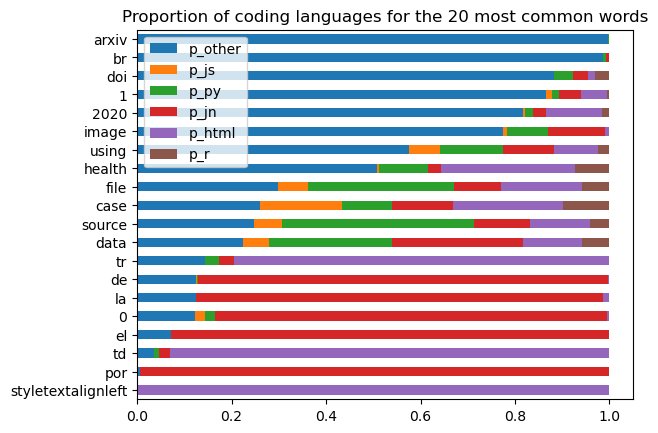

In [29]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_other=word_counts.other / word_counts['all'],
         p_js=word_counts.js / word_counts['all'],
         p_py=word_counts.py / word_counts['all'],
         p_jn=word_counts.jn / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
         p_r=word_counts.r / word_counts['all'])
 .sort_values(by='all')
 [['p_other', 'p_js', 'p_py', 'p_jn', 'p_html', 'p_r']]
 .tail(20)
 .sort_values('p_other')
 .plot.barh(stacked=True))

plt.title('Proportion of coding languages for the 20 most common words')


In [30]:
def explore_plots(train):
    '''
    This function plots the necessary plots to visualize in exploration
    '''
    word_counts=words(train)
    
    other_pop=word_counts.sort_values(by='other', ascending=False).head(10)
    js_pop=word_counts.sort_values(by='js', ascending=False).head(10)
    py_pop=word_counts.sort_values(by='py', ascending=False).head(10)
    jn_pop=word_counts.sort_values(by='jn', ascending=False).head(10)
    html_pop=word_counts.sort_values(by='html', ascending=False).head(10)
    r_pop=word_counts.sort_values(by='r', ascending=False).head(10)
    
    plt.figure(figsize=(15,5))
    plt.subplot(321)
    plt.bar(height=other_pop['other'],x=other_pop.index,label='Other')
    plt.title('Common Words for "Other"')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    

    plt.subplot(322)
    plt.bar(height=js_pop['js'],x=js_pop.index,label='JavaScript', color='rebeccapurple')
    plt.title('Common Words for JavaScript')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(323)
    plt.bar(height=py_pop['py'],x=js_pop.index,label='Python', color='seagreen')
    plt.title('Common Words for Python')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(324)
    plt.bar(height=jn_pop['jn'],x=js_pop.index,label='Jupyter Notebook', color='peru')
    plt.title('Common Words for Jupyter Notebook')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(325)
    plt.bar(height=html_pop['html'],x=js_pop.index,label='HTML', color='darkkhaki')
    plt.title('Common Words for HTML')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(326)
    plt.bar(height=r_pop['r'],x=js_pop.index,label='R', color= 'darkred')
    plt.title('Common Words for R')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    
    
    
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=2,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()

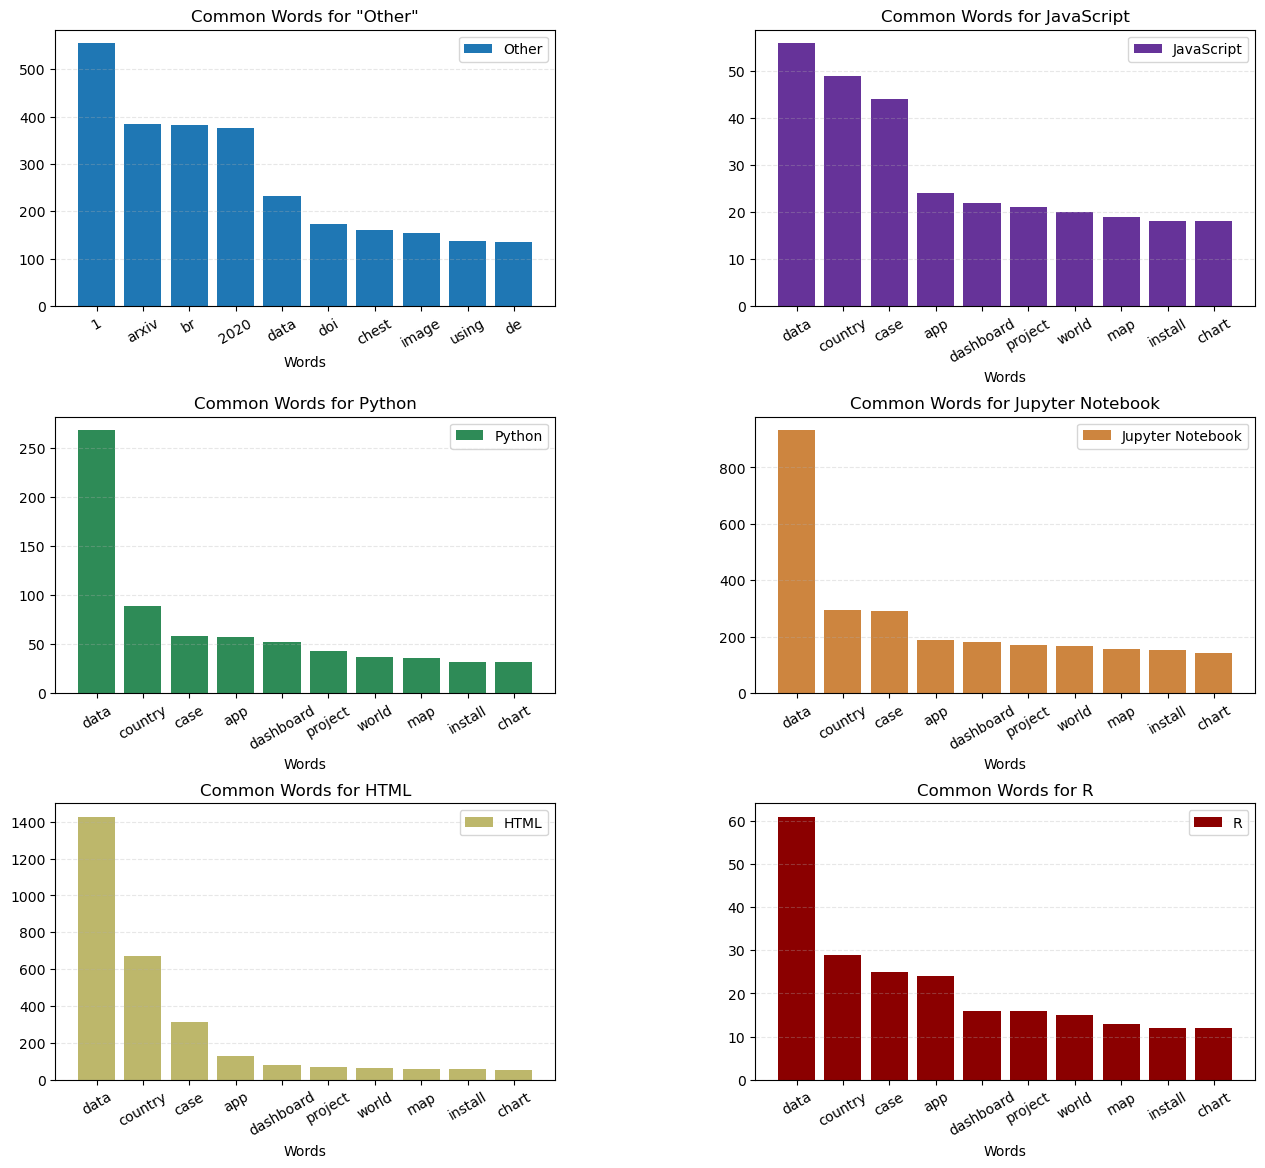

In [31]:
explore_plots(train)

In [32]:
other_pop=word_counts.sort_values(by='other', ascending=False).head(10)
js_pop=word_counts.sort_values(by='js', ascending=False).head(10)
py_pop=word_counts.sort_values(by='py', ascending=False).head(10)
jn_pop=word_counts.sort_values(by='jn', ascending=False).head(10)
html_pop=word_counts.sort_values(by='html', ascending=False).head(10)
r_pop=word_counts.sort_values(by='r', ascending=False).head(10)

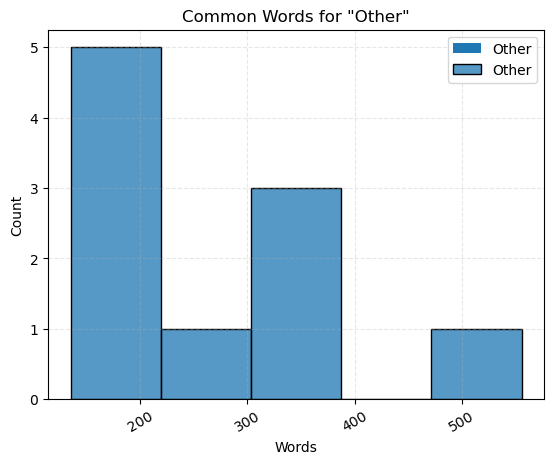

In [33]:
sns.histplot(x='other', data=other_pop,label='Other')
plt.title('Common Words for "Other"')
plt.xlabel('Words')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()
plt.show()

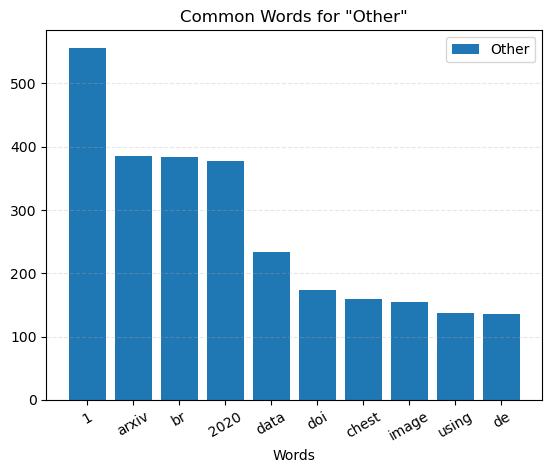

In [34]:
plt.subplot(111)
plt.bar(height=other_pop['other'],x=other_pop.index,label='Other')
plt.title('Common Words for "Other"')
plt.xlabel('Words')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [35]:
other_pop

,all,other,js,py,jn,html,r
1,642,556,8,9,30,36,3
arxiv,386,385,0,1,0,0,0
br,388,383,0,2,3,0,0
2020,461,377,2,7,13,55,7
data,1036,233,56,269,289,128,61
doi,196,173,0,8,6,3,6
chest,182,160,0,7,15,0,0
image,199,154,2,17,24,2,0
using,240,138,16,32,26,22,6
de,1077,135,2,2,934,4,0


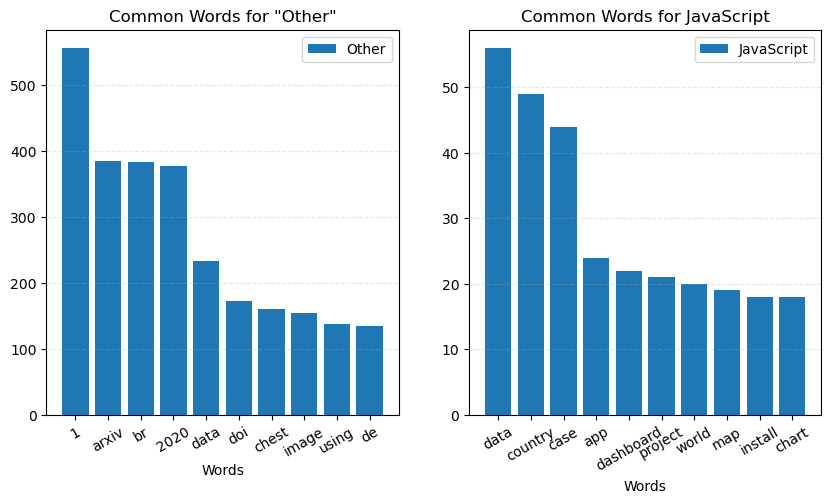

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(height=other_pop['other'],x=other_pop.index,label='Other')
plt.title('Common Words for "Other"')
plt.xlabel('Words')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()


plt.subplot(122)
plt.bar(height=js_pop['js'],x=js_pop.index,label='JavaScript')
plt.title('Common Words for JavaScript')
plt.xlabel('Words')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()
